<a href="https://colab.research.google.com/github/santosmonteiro-joana/DataMiningA1/blob/main/current_dm_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240423%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240423T235049Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3f34ef180cf8cb094240d6a35254d78052d08868a059506f5b910f0a885214e9196845c142fe2235ea02a3d6ea3242fd876bbe7e3be7b7d1bfd9333af60b05986c12b8887981a6a6c70bbd65b101473b3a453d5d652ffaecf78a8c6f877bde4be8b432d80f6946da681e14e4b7acfb9760079e0f5f23537d94c9ff14ee84fe849cabd02cd6540a7fa688752d514aba17c695ce04862b14aa5299df8cccd9911b89cce7effd265e831e9c95dd9627fdc9b678cdff620e491c7d31ac45ffe87259ed26d5b667f6d61a78a23e0b6bb3fa24e6ee4af06da7bcfcd91d4b4710706136e56fca11a17334ce69fa0c4d021e99a050db30c5e49facb66e5ee4eadde2c591'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34877 bytes downloaded
Downloaded and uncompressed: titanic
Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv


In [ ]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Remarks:
1. values and null
- few non-null values in Cabin
- a bit of null values in Age, can fill the empty values, e.g. with mean of the known values in the column
- a couple of null Embarked - can just get rid of those examples

2. type of feature
- mostly numerical columns like Age
- some of type object - categorical data, we can:
    - use dummy values (pd.get_dummies)
    - convert strings to numbers (e.g. male = 0, female = 1)
    
    
3. others:
- can normalize numerical values, why?
    - equal scale to features
    - regularize - independent of feature length?
    - easier to interpret
- analysis of which columns don't contribute to the result (drop them)

Exploring data - getting more information, here for numerical data:
- histogram: shows distribution of data
- corrplot (heatmap): pairwise correlation between variables


Separate numeric and categorical values to be able to analyze

In [ ]:
df_num = train_df[['Pclass','Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Sex','Ticket','Cabin','Embarked']]

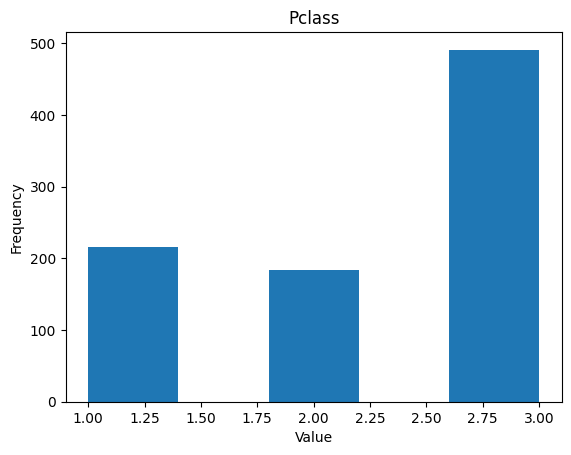

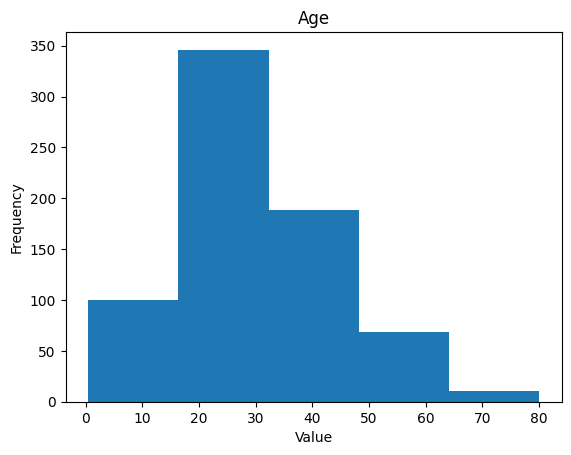

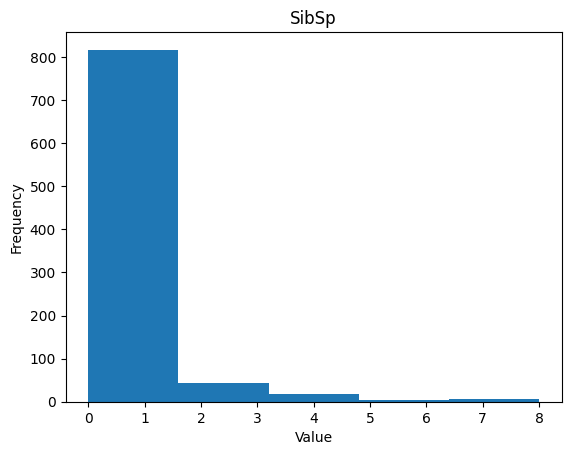

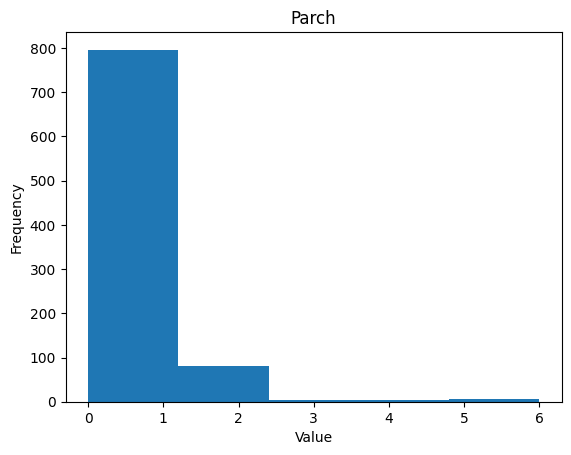

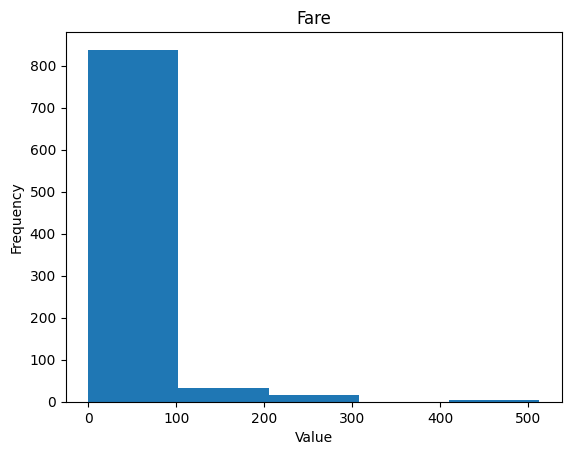

In [ ]:
#histograms without normalizing
for column in df_num.columns:
    plt.hist(df_num[column], bins = 5, label=column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

In [ ]:
#normalizing columns in df_num

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_normalized = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)


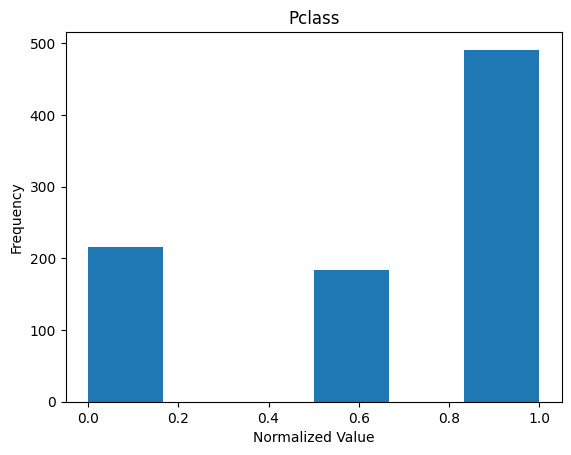

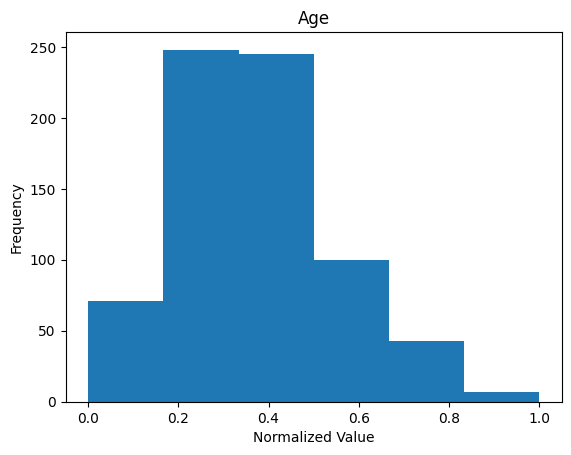

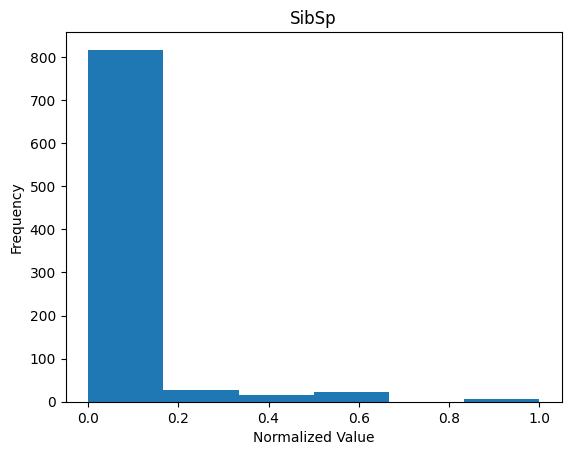

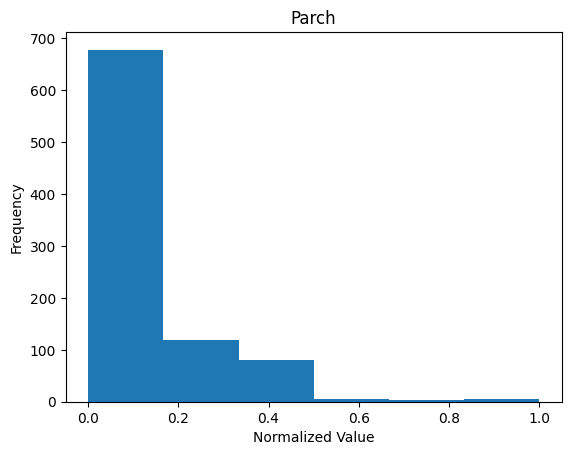

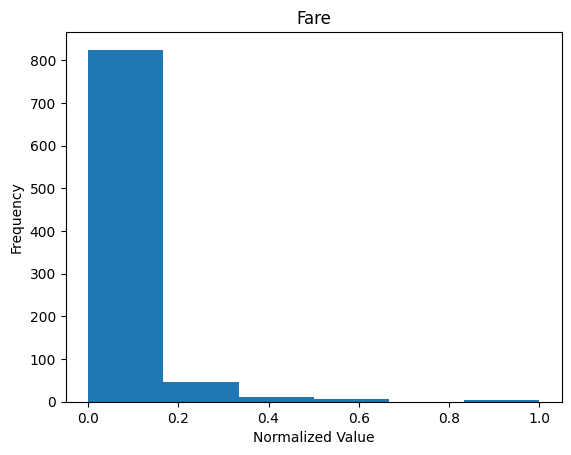

In [ ]:
#plot histogram of normalized columns
for column in df_num_normalized.columns:
    plt.hist(df_num_normalized[column], bins = 6, label=column)
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000


<Axes: >

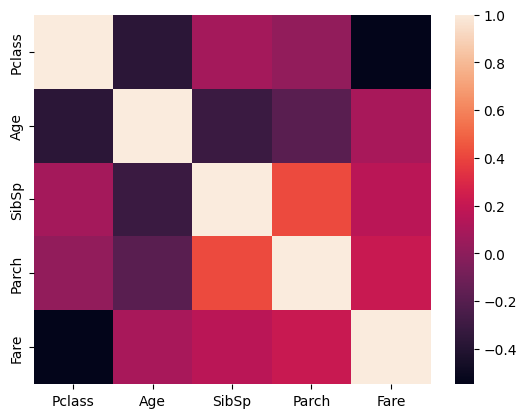

In [ ]:
#heatmap - correlation between variables

print(df_num.corr())
sns.heatmap(df_num.corr())

why heatmap is important?
- highly correlated features provide less useful information (may lead to overfitting), best to choose e.g. one of them. *feature selection*
- can make new features based on those relationships, e.g. for highly correlated, can create a new feature like their product *feature engineering*

In [ ]:
#working copies
train_df_copy = train_df.copy()
test_df_copy = test_df.copy() #dropping the same columns to be consistent
df_num_copy = df_num.copy()
df_cat_copy = df_cat.copy()

In [ ]:
#drop null Embarked - only 2 rows
train_df_copy.dropna(subset=['Embarked'], inplace = True)

In [ ]:
#fill missing values in Age - replace with median of the data
train_df_copy['Age'] = train_df_copy['Age'].fillna(train_df['Age'].median())
train_df_copy.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.363096,0.065523,0.063742,0.062649
std,256.998173,0.486260,0.834700,0.163168,0.137963,0.134460,0.097003
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.271174,0.000000,0.000000,0.015412
50%,446.000000,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213
75%,668.000000,1.000000,3.000000,0.434531,0.125000,0.000000,0.060508
max,891.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#remove Name, Cabin, Ticket
train_df.head()
train_df_copy.drop(['Name', 'Cabin', 'Ticket'], axis = 1, inplace = True  )

In [ ]:
# encode categorical data
train_df_copy = pd.get_dummies(train_df_copy, columns=['Embarked', 'Sex'], drop_first = False)

In [ ]:
df_num_copy = train_df_copy[['Age','SibSp','Parch','Fare']]

scaler = MinMaxScaler()

train_df_copy[df_num_copy.columns] = scaler.fit_transform(df_num_copy)

It is neccesary to do the same for test dataframe, so the columns will match  

In [ ]:
train_df_copy.head(10)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,0.271174,0.125,0.000000,0.014151,False,False,True,False,True
1,2,1,1,0.472229,0.125,0.000000,0.139136,True,False,False,True,False
2,3,1,3,0.321438,0.000,0.000000,0.015469,False,False,True,True,False
3,4,1,1,0.434531,0.125,0.000000,0.103644,False,False,True,True,False
4,5,0,3,0.434531,0.000,0.000000,0.015713,False,False,True,False,True
5,6,0,3,0.346569,0.000,0.000000,0.016510,False,True,False,False,True
6,7,0,1,0.673285,0.000,0.000000,0.101229,False,False,True,False,True
7,8,0,3,0.019854,0.375,0.166667,0.041136,False,False,True,False,True
8,9,1,3,0.334004,0.000,0.333333,0.021731,False,False,True,True,False
9,10,1,2,0.170646,0.125,0.000000,0.058694,True,False,False,True,False


In [ ]:
print(list(train_df_copy.columns))

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']


In [ ]:
train_df_copy.to_csv('filename.csv', index=False)